In [1]:
import ast
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt  
dataset = pd.read_csv('data_jobs.csv')

In [3]:
dataset['job_posted_date'] = pd.to_datetime(dataset['job_posted_date'])
dataset['job_skills'] = dataset['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df_ind= dataset[(dataset['job_country'] == 'India')].dropna(subset=['salary_year_avg'])

In [7]:
df_ind

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1209,Machine Learning Engineer,Computer Vision Developer (R&D),"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-02-18 13:12:30,False,False,India,year,79200.0,NaN,Bosch Group,"[python, opencv, tensorflow, pytorch, keras, m...","{'libraries': ['opencv', 'tensorflow', 'pytorc..."
2022,Data Engineer,Data Engineer - SQL (Power BI),India,via Ai-Jobs.net,Full-time,False,India,2023-10-31 13:09:54,False,False,India,year,156500.0,NaN,Gartner,"[java, t-sql, sql, azure, power bi, dax, notion]","{'analyst_tools': ['power bi', 'dax'], 'async'..."
2785,Data Engineer,Staff Software Engineer - Data Engineering (Ja...,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-05-26 13:13:28,False,False,India,year,147500.0,NaN,Zscaler,"[java, nosql, neo4j, redshift, aws, spring, sp...","{'analyst_tools': ['excel'], 'cloud': ['redshi..."
3190,Senior Data Engineer,Senior Big Data DevOps & Deployment Engineer,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-07-07 13:14:21,False,False,India,year,79200.0,NaN,ServiceNow,"[sql, perl, bash, groovy, python, shell, redis...","{'analyst_tools': ['tableau'], 'cloud': ['azur..."
3930,Data Scientist,Lead Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-12-12 13:27:33,False,False,India,year,114516.0,NaN,Boeing,"[python, r, c++, tensorflow, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783733,Senior Data Scientist,Senior Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-06-27 06:12:11,False,False,India,year,157500.0,NaN,Publicis Groupe,"[aws, spark, tableau, cognos, excel, powerpoin...","{'analyst_tools': ['tableau', 'cognos', 'excel..."
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,"[power bi, tableau]","{'analyst_tools': ['power bi', 'tableau']}"
784768,Data Scientist,SR. DATA SCIENTIST,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-01-03 06:25:25,False,False,India,year,157500.0,NaN,Optiv,"[r, python, sql, databricks, power bi]","{'analyst_tools': ['power bi'], 'cloud': ['dat..."
785395,Data Engineer,Senior Consultant - Tech Consulting -Azure Dat...,India,via Ai-Jobs.net,Full-time,False,India,2023-12-19 06:10:41,False,False,India,year,64800.0,NaN,EY,"[sql, python, azure, databricks, spark, power ...","{'analyst_tools': ['power bi', 'tableau', 'qli..."


In [8]:
job_titles = df_ind['job_title_short'].value_counts().index[:6].tolist()

In [9]:
job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

In [11]:
df_ind_top6 = df_ind[df_ind['job_title_short'].isin(job_titles)]

In [12]:
job_order = df_ind_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

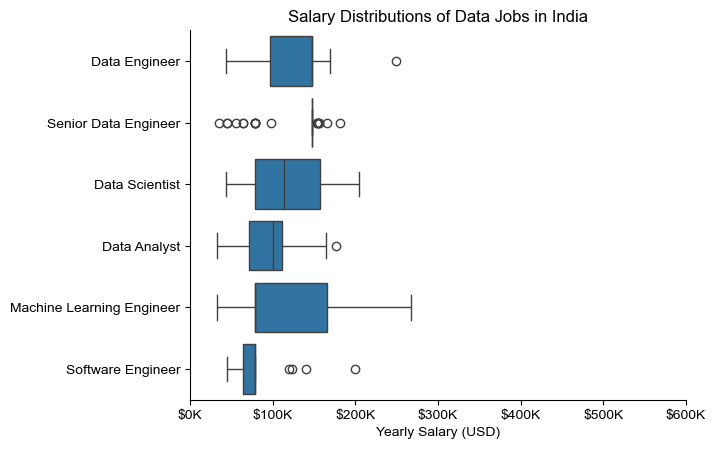

In [13]:
sns.boxplot(data=df_ind_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [16]:
df_DA_India = dataset[(dataset['job_title_short'] == 'Data Analyst')& (dataset['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_India = df_DA_India.dropna(subset=['salary_year_avg'])

df_DA_India = df_DA_India.explode('job_skills')

df_DA_India[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [17]:
df_DA_top_pay = df_DA_India.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [18]:
df_DA_skills = df_DA_India.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


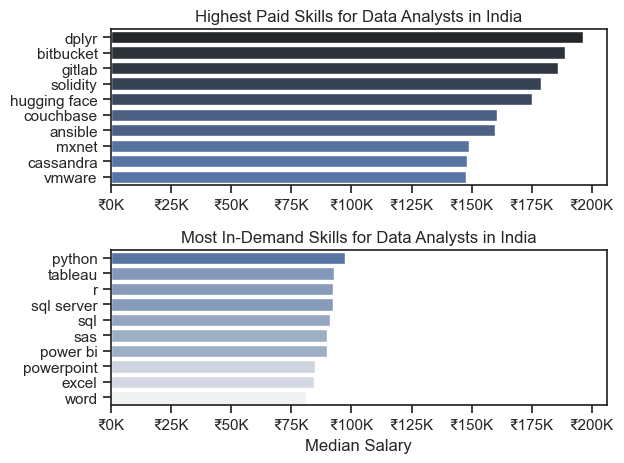

In [21]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in India')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'₹{int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in India')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'₹{int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()